 # Reading the Image of the brain

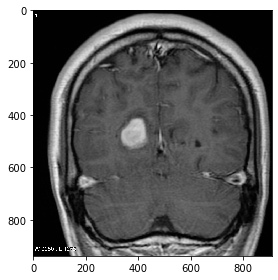

In [1]:
%matplotlib inline
import skimage.io as io
img= io.imread('/brain1.jpg')
io.imshow(img)
io.show()


# Template Matching for detecting the tumour affected area from the MRI Scan of the Patient's Brain

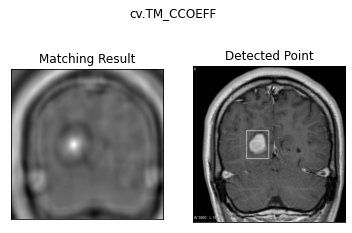

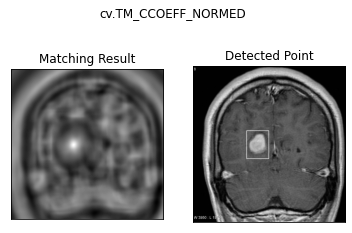

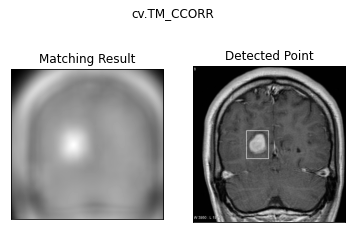

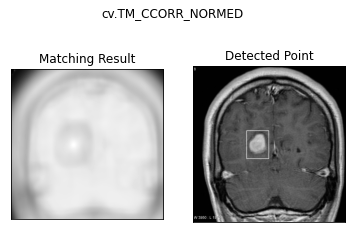

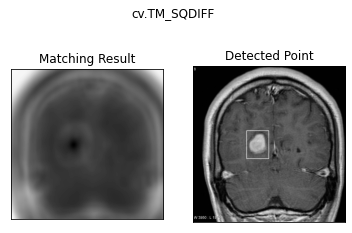

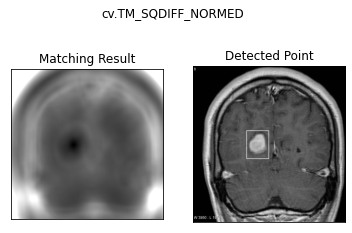

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/brain1.jpg',0)
img2 = img.copy()
template = cv.imread('/temp1.jpg',0)
w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


# K-Means Clustering to check the amyloid Fluid content and hence deduce if the patient is Alzheimer's Positive.

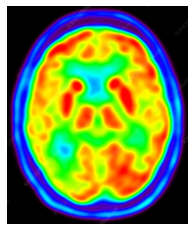

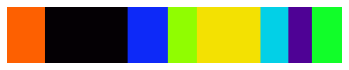

In [3]:
 #import the necessary packages
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import argparse
import utils
import cv2



image = cv2.imread("/pet.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)


image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 8)
clt.fit(image)

def centroid_histogram(clt):

	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)

	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

def plot_colors(hist, centroids):

	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	
	for (percent, color) in zip(hist, centroids):
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	
	return bar



hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()